<a href="https://colab.research.google.com/github/ganesh-7985/Machine_learning/blob/main/ann_fashion_mnist_pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [53]:
import torch
import pandas as pd
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt


In [54]:
torch.manual_seed(42);

In [55]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"using device:{device}")

using device:cuda


In [56]:
df = pd.read_csv('/content/fashion-mnist_train.csv')

In [57]:
df.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df.shape

(60000, 785)

In [59]:
df.columns

Index(['label', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5', 'pixel6',
       'pixel7', 'pixel8', 'pixel9',
       ...
       'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779', 'pixel780',
       'pixel781', 'pixel782', 'pixel783', 'pixel784'],
      dtype='object', length=785)

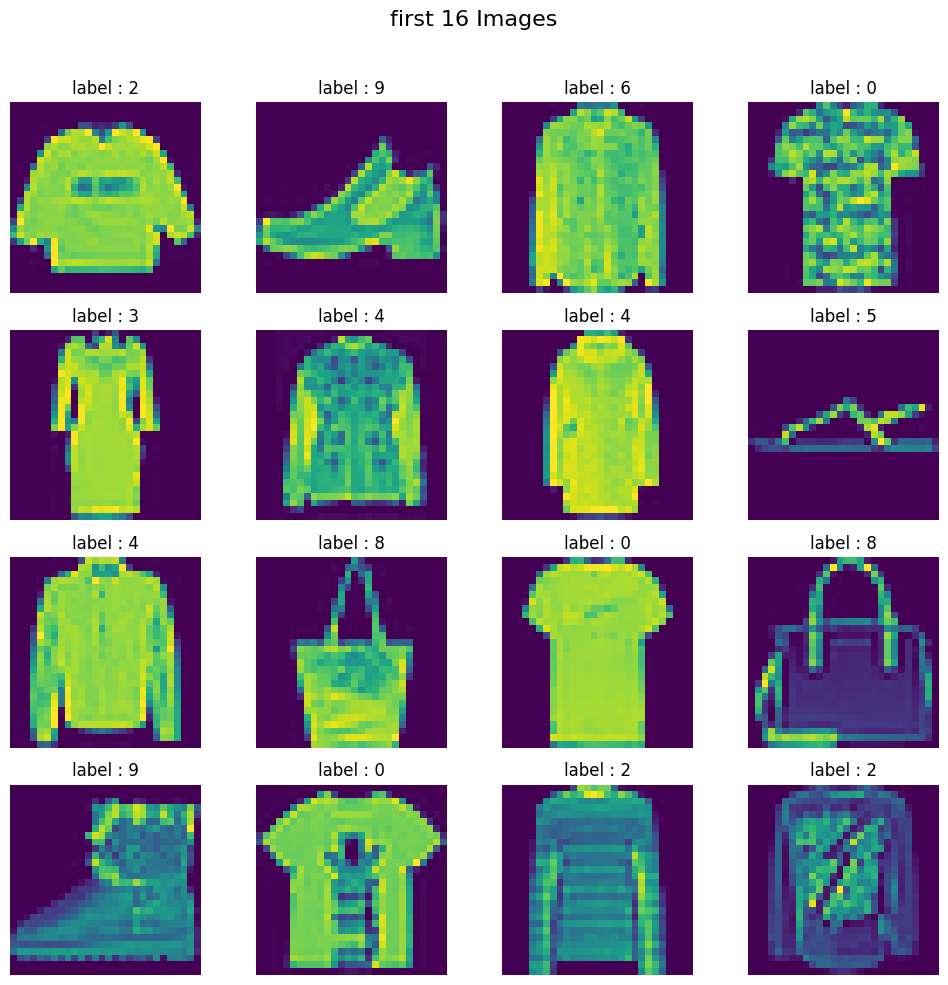

In [60]:
fig,axes = plt.subplots(4,4,figsize=(10,10))
fig.suptitle('first 16 Images',fontsize=16)

for i,ax in enumerate(axes.flat):
  img = df.iloc[i,1:].values.reshape(28,28)
  ax.imshow(img)
  ax.axis('off')
  ax.set_title(f"label : {df.iloc[i,0]}")

plt.tight_layout(rect=[0,0,1,0.96])
plt.show()

In [61]:
x = df.iloc[:,1:].values
y = df.iloc[:,0].values

In [62]:
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [63]:
# if you training a nn makesure values be in 0-1 range
# In the above some are values are 0 and other values 143,213 etc so now we need to scale
X_train = X_train/255.0
X_test = X_test/255.0

In [64]:
#create Custom Dataset Class
class CustomDataset(Dataset):
  def __init__(self,features,labels):
    self.features = torch.tensor(features,dtype=torch.float32)
    self.labels = torch.tensor(labels,dtype=torch.long)

  def __len__(self):
    return len(self.features)

  def __getitem__(self,idx):
    return self.features[idx],self.labels[idx]



In [65]:
# create Train data dataset
train_dataset = CustomDataset(X_train,y_train)

In [66]:
test_dataset = CustomDataset(X_test,y_test)

In [67]:
trainLoader = DataLoader(train_dataset,batch_size=32,shuffle=True,pin_memory=True)
testLoader = DataLoader(test_dataset,batch_size=32,shuffle=False,pin_memory=True)

In [69]:
# create NN for this
class fashnetModel(nn.Module):
  def __init__(self,num_features):
    super().__init__()
    self.model = nn.Sequential(
        nn.Linear(num_features,128),
        nn.BatchNorm1d(128),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(128,64),
        nn.BatchNorm1d(64),
        nn.ReLU(),
        nn.Dropout(p=0.3),
        nn.Linear(64,10)
    )

  def forward(self,x):
    return self.model(x)

In [70]:
epochs = 100
learning_rate = 0.1

In [71]:
model = fashnetModel(X_train.shape[1])
model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(),lr=learning_rate,weight_decay=1e-4)

In [72]:
# Training Loop
for epoch in range(epochs):
  total_epoch_loss = 0
  for batch_features, batch_labels in trainLoader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)
    # forward pass
    outputs = model(batch_features)
    #loss calculation
    loss = criterion(outputs,batch_labels)
    # BackPropagation
    optimizer.zero_grad()
    loss.backward()
    # Update grads
    optimizer.step()
    total_epoch_loss += loss.item()

  avg_loss = total_epoch_loss/len(trainLoader)
  print(f'Epoch [{epoch+1}/{epochs}], Loss: {avg_loss}')


Epoch [1/100], Loss: 0.6249084657629331
Epoch [2/100], Loss: 0.49199690653880435
Epoch [3/100], Loss: 0.45562089485426743
Epoch [4/100], Loss: 0.43380642544229825
Epoch [5/100], Loss: 0.41715061584611735
Epoch [6/100], Loss: 0.40564093277355034
Epoch [7/100], Loss: 0.3941608931571245
Epoch [8/100], Loss: 0.38580174928406874
Epoch [9/100], Loss: 0.3743983890265226
Epoch [10/100], Loss: 0.3725726637095213
Epoch [11/100], Loss: 0.36783315147956214
Epoch [12/100], Loss: 0.3572052289446195
Epoch [13/100], Loss: 0.35052060889204345
Epoch [14/100], Loss: 0.3449219484726588
Epoch [15/100], Loss: 0.34472562207778296
Epoch [16/100], Loss: 0.33732124184072015
Epoch [17/100], Loss: 0.3344038988550504
Epoch [18/100], Loss: 0.3302020480086406
Epoch [19/100], Loss: 0.33063985937833784
Epoch [20/100], Loss: 0.3262277270356814
Epoch [21/100], Loss: 0.3208496819138527
Epoch [22/100], Loss: 0.3183093272894621
Epoch [23/100], Loss: 0.3225850373158852
Epoch [24/100], Loss: 0.31459670132398604
Epoch [25/100

In [73]:
model.eval()

fashnetModel(
  (model): Sequential(
    (0): Linear(in_features=784, out_features=128, bias=True)
    (1): BatchNorm1d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): Dropout(p=0.3, inplace=False)
    (4): Linear(in_features=128, out_features=64, bias=True)
    (5): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): Dropout(p=0.3, inplace=False)
    (8): Linear(in_features=64, out_features=10, bias=True)
  )
)

In [74]:
# eval_code
total = 0
correct = 0
with torch.no_grad():
  for batch_features,batch_labels in testLoader:
    batch_features = batch_features.to(device)
    batch_labels = batch_labels.to(device)
    output = model(batch_features)
    _,predicted = torch.max(output.data,1)
    total += batch_labels.size(0)
    correct += (predicted == batch_labels).sum().item()

print(correct/total)

0.88325
